# Pretrain Data Analysis

训练前的数据分析工作

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
import os
import numpy as np

导入所有本地所需函数

In [4]:
from utils.corr import diagcorr
from utils.viz import hic_heatmap
from utils.io import compactM, spreadM, downsampling, pooling

### 以 GM12878 中 17 号染色体为例

In [5]:
down_ratio = 16
max_reads = 100
data_dir = os.path.join('/data/RaoHiC/processing/')

In [6]:
data = np.load(os.path.join(data_dir, 'GM12878/chr17_10kb.npz'))
hic = data['hic']
cidx = data['compact']

In [7]:
data_rep = np.load(os.path.join(data_dir, 'GM12878R/chr17_10kb.npz'))
hic_rep = data_rep['hic']
cidx_rep = data_rep['compact']

In [8]:
cidx_set = set(cidx)
cidx_setr = set(cidx_rep)
new_cidx = np.array(list(cidx_set.intersection(cidx_setr)))

In [9]:
hic = compactM(hic, new_cidx, verbose=True)
hic_rep = compactM(hic_rep, new_cidx, verbose=True)

Compacting a (8127, 8127) shaped matrix to (7669, 7669) shaped!
Compacting a (8127, 8127) shaped matrix to (7669, 7669) shaped!


In [10]:
down_data = np.load(os.path.join(data_dir, 'GM12878/chr17_40kb.npz'))
down_hic = down_data['hic']
down_hic = compactM(down_hic, new_cidx, verbose=True)

Compacting a (8127, 8127) shaped matrix to (7669, 7669) shaped!


In [11]:
hic_pos = hic[hic>0]
down_hic_pos = down_hic[down_hic>0]
hic_rep_pos = hic_rep[hic_rep>0]
pool_hic = pooling(down_hic, 4, return_array=True, pool_type='max')
pool_hic_pos = pool_hic[pool_hic>0]
print('Non-Sparsity of Hic(pri) matrix: {:.4f}'.format(len(hic_pos)/(hic.shape[0]**2)))
print('Non-Sparsity of Hic(rep) matrix: {:.4f}'.format(len(hic_rep_pos)/(hic_rep.shape[0]**2)))
print('Non-Sparsity of Hic(down) matrix: {:.4f}'.format(len(down_hic_pos)/(down_hic.shape[0]**2)))
print('Non-Sparsity of Hic(pool) matrix: {:.4f}'.format(len(pool_hic_pos)/(pool_hic.shape[0]**2)))

(7669, 7669) sized matrix is max pooled to (1917, 1917) size, with 4x4 down scale.
Non-Sparsity of Hic(pri) matrix: 0.1646
Non-Sparsity of Hic(rep) matrix: 0.1307
Non-Sparsity of Hic(down) matrix: 0.0295
Non-Sparsity of Hic(pool) matrix: 0.1826


In [12]:
from utils.ssim import gaussian_filter
gau_hic = gaussian_filter(down_hic[:500,:500], 11, 1.5)
gau_hic = np.minimum(max_reads, gau_hic)

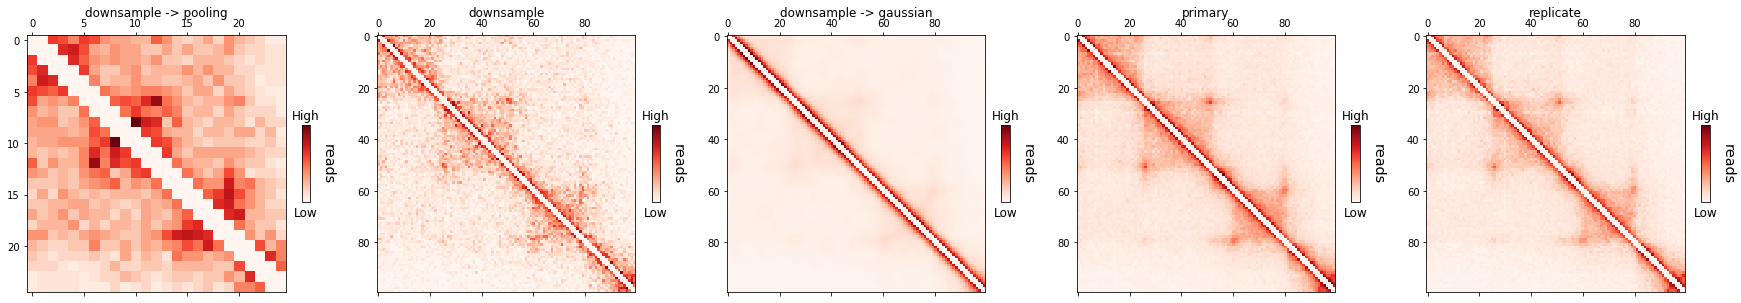

In [13]:
data = [pool_hic[:25,:25], down_hic[:100, :100], gau_hic[:100, :100], hic[:100, :100], hic_rep[:100, :100]]
titles = ['downsample -> pooling','downsample', 'downsample -> gaussian', 'primary', 'replicate']
hic_heatmap(data, dediag=2, ncols=5, titles=titles)

In [14]:
r, p = diagcorr(hic[:500, :500], hic_rep[:500, :500])
rd, pd = diagcorr(hic[:500, :500], down_hic[:500, :500])
rg, pg = diagcorr(hic[:500, :500], gau_hic[:500, :500])

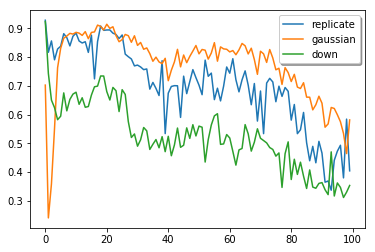

In [15]:
fig, ax = plt.subplots()
ax.plot(r, label='replicate')
ax.plot(rg, label='gaussian')
ax.plot(rd, label='down')
legend = ax.legend(loc='upper right', shadow=True)

In [16]:
hic = np.minimum(max_reads, hic)
hic_rep = np.minimum(max_reads, hic_rep)
down_hic = np.minimum(max_reads//2, down_hic)
pool_hic = np.minimum(max_reads, pool_hic)

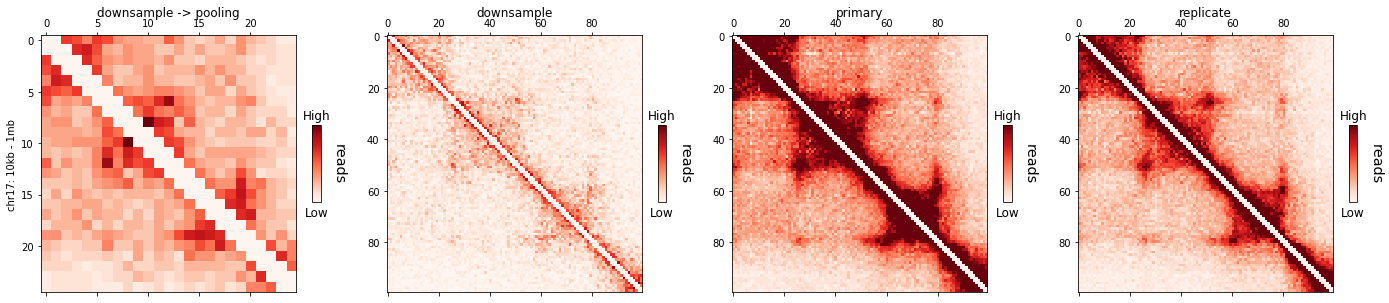

In [17]:
data = [pool_hic[:25,:25], down_hic[:100, :100], hic[:100, :100], hic_rep[:100, :100]]
titles = ['downsample -> pooling','downsample', 'primary', 'replicate']
ylabel = ['chr17: 10kb - 1mb']
hic_heatmap(data, dediag=2, ncols=4, titles=titles, y_labels=ylabel)

In [18]:
from utils.viz import hic_joint

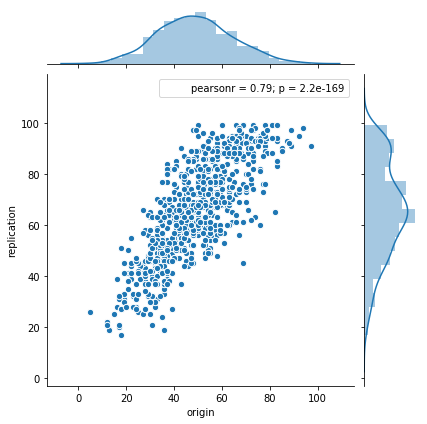

In [19]:
frame_data = hic_joint(hic_rep[:1000,:1000], hic[:1000,:1000], distance=(10, 11), clear_max_min=True)

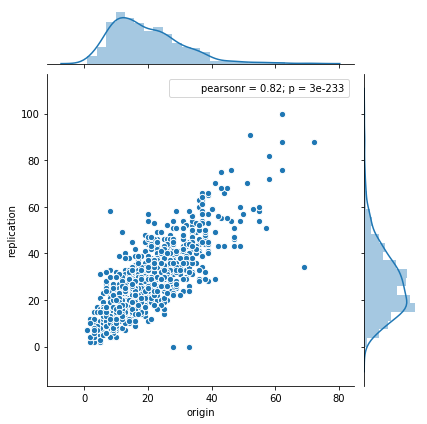

In [20]:
framedata = hic_joint(hic_rep[:1000,:1000], hic[:1000,:1000], distance=(30, 31), clear_max_min=False)

In [21]:
r, p = diagcorr(hic[:500, :500], hic_rep[:500, :500])
rd, pd = diagcorr(hic[:500, :500], down_hic[:500, :500])

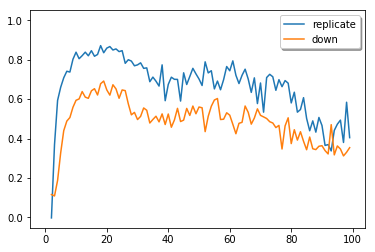

In [22]:
fig, ax = plt.subplots()
ax.plot(r, label='replicate')
ax.plot(rd, label='down')
legend = ax.legend(loc='upper right', shadow=True)

In [23]:
sr, sp = diagcorr(hic, hic_rep, percentile=99)
sr1, sp1 = diagcorr(hic, hic_rep, percentile=99, rtype='spearman')

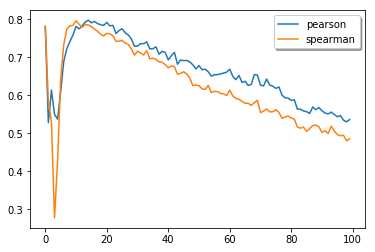

In [24]:
fig, ax = plt.subplots()
ax.plot(sr, label='pearson')
ax.plot(sr1, label='spearman')
legend = ax.legend(loc='upper right', shadow=True)